## An unsupervised clustering to identify 2 groups of distinct technical profiles

In [1]:
# Import des libraries classiques (numpy, pandas, ...)
import pandas as pd
import numpy as np
import re
import sklearn as sk
import seaborn as sb
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
import os 

In [3]:
pwd

'/Users/parisaghazizadeh/Dropbox/Aquila_test'

In [4]:
# Import du dataframe "data.csv"
df = pd.read_csv('/Users/parisaghazizadeh/Dropbox/Aquila_test/data.csv')

In [5]:
# Allure générale des données
df.head(10)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,"1,5",Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,6,Lille
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,0,Lille
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,4,Toulouse
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,8,Paris
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,5,Toulouse


In [6]:
# Edition des différentes features
df.columns

Index(['Entreprise', 'Metier', 'Technologies', 'Diplome', 'Experience',
       'Ville'],
      dtype='object')

In [7]:
# Informations générales sur les données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Entreprise    9565 non-null   object
 1   Metier        9563 non-null   object
 2   Technologies  9582 non-null   object
 3   Diplome       9582 non-null   object
 4   Experience    9488 non-null   object
 5   Ville         9582 non-null   object
dtypes: object(6)
memory usage: 449.3+ KB


Remarque : il y a des données manquantes et les variables sont de type objet, même les années d'expérience!

In [8]:
# Nombre de personnes par métier
group_count_metier = pd.DataFrame(df.groupby('Metier').size(), columns= ['count'])

In [9]:
group_count_metier

,count
Metier,
Data architecte,2123
Data engineer,2347
Data scientist,3865
Lead data scientist,1228


In [10]:
# Conversion de la colonne 'expérience' de 'object' à 'float'
df['Experience'] = df['Experience'].str.replace(',', '.').astype(float)

In [11]:
# Vérification que la conversion est faite
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Entreprise    9565 non-null   object 
 1   Metier        9563 non-null   object 
 2   Technologies  9582 non-null   object 
 3   Diplome       9582 non-null   object 
 4   Experience    9488 non-null   float64
 5   Ville         9582 non-null   object 
dtypes: float64(1), object(5)
memory usage: 449.3+ KB


In [12]:
df.head(5)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux


In [13]:
# Dimension du dataframe
df.shape

(9582, 6)

In [14]:
# Visualisation des valeurs manquantes dans chaque colonne (c'est-à-dire pour chaque variable)
df.isnull().sum()

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64

In [15]:
# Nombre total de valeurs manquantes
df.isnull().sum().sum()

130

On a environ 10000 données avec 6 features. Il y a 130 valeurs manquantes, présentes dans les variables  'Entreprise', 'Metier' and 'Experience'. 

### L'imputation des valeurs manquantes pour la variable "Experience" avec : 
- la valeur médiane pour les data scientists
- la valeur moyenne pour les data engineers

### Replacement des valeurs manquantes pour les data scientist

In [16]:
# on sélectionne les data scientist
data_scientist = df.loc[df['Metier'] == 'Data scientist'].copy()

In [17]:
# taille du tableau extrait
data_scientist.shape

(3865, 6)

In [18]:
# vérification
data_scientist

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,0.0,Lille
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,4.0,Toulouse
...,...,...,...,...,...,...
9577,Massachusetts General Hospital(MGH),Data scientist,C++/R/Python/Matlab/Matplotlib,Master,1.5,Lyon
9578,Charles River Analytics,Data scientist,Excel/Python/Matlab/R/machine learning/anglais,Master,11.0,Toulouse
9579,Ball Aerospace,Data scientist,R/machine learning/Excel/VBA,Master,1.0,Paris
9580,Takeda Pharmaceutical,Data scientist,Python/Pyspark/machine learning/Microsoft Azure,Master,17.0,Rennes


In [19]:
# calcul du nombre de valeurs manquantes pour les data scientist
df[df['Metier'] == 'Data scientist'].isnull().sum()

Entreprise       5
Metier           0
Technologies     0
Diplome          0
Experience      32
Ville            0
dtype: int64

In [20]:
# pour remplir les valeurs manquantes par la médianne, on peut utiliser fillna()
data_scientist['Experience'].fillna(data_scientist['Experience'].median(), inplace= True)

In [21]:
# vérification les valeurs manquantes de data scientist
data_scientist.isnull().sum()

Entreprise      5
Metier          0
Technologies    0
Diplome         0
Experience      0
Ville           0
dtype: int64

In [22]:
#ajouter le groupe de data scientist sans les valeurs manquantes au dataframe
df[df['Metier'] ==  'Data scientist'] = data_scientist

In [23]:
df.head(5)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux


### Remplacement des valeurs manquantes pour data engineer:


In [24]:
# on sélectionne les data engineer
data_engineer= df.loc[df['Metier'] == 'Data engineer'].copy()

In [25]:
df.isnull().sum()

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      62
Ville            0
dtype: int64

In [26]:
data_engineer.head(5)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,5.0,Toulouse
10,KPMG,Data engineer,Hadoop/Hive/SQL/MariaDB,Master,0.5,Bordeaux
15,Benchling,Data engineer,Python/Pyspark/Spark,Master,3.0,Lyon
18,Natera,Data engineer,Python/Pyspark/Spark,Master,3.0,Lille
19,Ball Aerospace,Data engineer,Docker/PostgreSQL/Elasticsearch/Kibana/MongoDB,No diploma,8.0,Lyon


In [27]:
# # taille du tableau extrait
data_engineer.shape

(2347, 6)

In [28]:
data_engineer.isnull().sum()

Entreprise       4
Metier           0
Technologies     0
Diplome          0
Experience      20
Ville            0
dtype: int64

In [29]:
# # pour remplir les valeurs manquantes par la moyen, on peut utiliser fillna()
data_engineer['Experience'].fillna(data_engineer['Experience'].mean(), inplace= True)

In [30]:
# vérification les valeurs manquantes de data engineer
data_engineer.isnull().sum()

Entreprise      4
Metier          0
Technologies    0
Diplome         0
Experience      0
Ville           0
dtype: int64

In [31]:
#ajouter le groupe de data engineer sans les valeurs manquantes au dataframe
df[df['Metier'] == 'Data engineer'] = data_engineer

In [32]:
df.isnull().sum()

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      42
Ville            0
dtype: int64

#### Combien d'années d'expériences ont, en moyenne, chacun des profils : le data scientist, le lead data scientist et le data engineer en moyenne:

In [33]:
# moyen des années d'expérience pour chaque metier
experiences = df.groupby('Metier').mean()

In [34]:
experiences

,Experience
Metier,
Data architecte,3.000476
Data engineer,2.984959
Data scientist,2.241268
Lead data scientist,3.965261


#### Visualition du nombre moyen d'années d'expérience pour les différents métiers: 
On choisi le boxplot car on peut voir le min, max, le premier quartile, le troisième quartile et la médiane, et on peut comparer ces valeurs pour différents groupes.

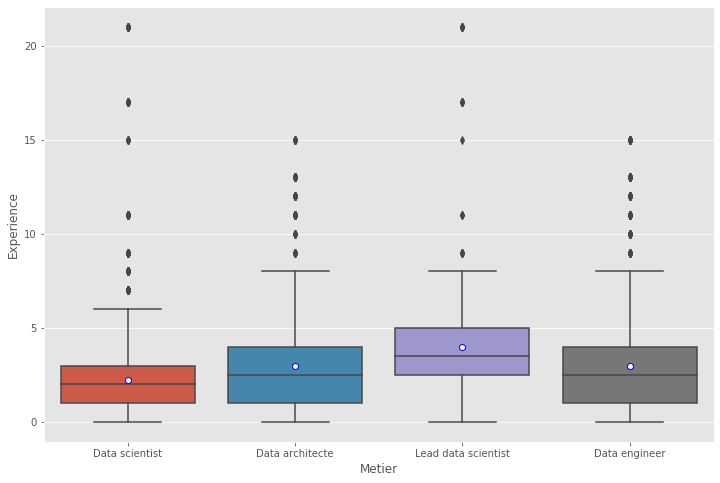

In [35]:
# visualisation des expériences pour les différets métiers
plt.figure(figsize=(12,8))
sb.boxplot(x=df['Metier'], y=df['Experience'], showmeans = True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"blue"})
plt.show()


On fait des diagrammes en boîte, en ajoutant la moyenne (le petit rond blanc). En moyenne les data scientist ont le moins d'années d'expérience (2 ans), ensuite à égalité data architectes et data engineer (2,5 ans) puis les lead data scientist (4 ans).

### Transformer la variable continue 'Experience' en une nouvelle variable catégorielle 'Exp_label' à 4 modalités: débutant, confirmé, avancé et expert

Pour créer la nouvelle fonctionnalité **Exp_label**, on peut écrire une fonction qui retourne 4 valeurs: débutant, confirmé, avancé, expert, basée sur les années d'expérience. On met 4 niveaux: débutant jusqu'à 1.5 ans, confirmé jusqu'à 3 ans, et expert au-delà de 4.5 ans. Ensuite on applique cette fonction à la feature 'Experience' pour créer la nouvelle colonne **Exp_label**.

In [36]:
# définition de la fonction pour créer 'Exp_label'
def exper(x):
    if 0 <= x < 1.5:
        return "Débutant"
    elif 1.5 <= x < 3:
        return "confirmé"
    elif 3 <= x < 4.5:
        return "avancé"
    elif x >= 4.5:
        return "expert"


In [37]:
# ajout de la colonne 'Exp_label' au dataframe
df['Exp_label'] = df['Experience'].apply(exper)

In [38]:
df.head(6)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,Débutant
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,avancé
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,avancé
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,confirmé
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,confirmé
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,6.0,Lille,expert


#### Les 5 technologies les plus utilisées :

In [39]:
df.isnull().sum()

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      42
Ville            0
Exp_label       42
dtype: int64

Il n'y a pas de valeurs manquantes pour les technologies.

In [40]:
#on crée une liste de technologies
tech = df['Technologies'].to_list()

In [41]:
tech

['Matlab/Python/Pyspark/Scikit-learn/Tensorflow',
 'Python/Java/Scala/MongoDB',
 'SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-learn',
 'C/C++/Java/Python',
 'Matlab/Python/C++/numpy/Tensorflow/scikit-learn',
 'VBA/Python/Excel/R',
 'Excel/VBA/R/Python/PySpark',
 'Java/C/C++/R/Python',
 'Java/Linux/Docker',
 'Python/Java/Linux/GNU',
 'Hadoop/Hive/SQL/MariaDB',
 'Python/R/machine learning/Excel/VBA/C++',
 'Python/Spark/Hive/Hadoop',
 'Python/AWS/Docker',
 'Python/Tensorflow/scikit-learn/Deep learning/R',
 'Python/Pyspark/Spark',
 'C/C++/Java/Python',
 'Python/Tensorflow/scikit-learn/Deep learning/R',
 'Python/Pyspark/Spark',
 'Docker/PostgreSQL/Elasticsearch/Kibana/MongoDB',
 'R/machine learning/Excel/VBA',
 'Elasticsearch/Kibana/MongoDB',
 'Python/Spark/Hive/Hadoop',
 'Python/Tensorflow/scikit-learn/Deep learning/R',
 'Java/Hadoop/HDFS/Yarn',
 'Python/Pyspark/machine learning/Microsoft Azure',
 'Python/Pyspark/Spark',
 'Elasticsearch/Kibana/Redshift',
 'SAS/Teradata/SQL/R/Python/Machin

In [42]:
# créer le dictionnaire du nombre technologies dans l'expertise des gens
count = dict()
for i in tech:
    skills = i.split('/')
    skills = [i.lower() for i in skills]
    for skill in skills:
        count[skill] = count.get(skill,0) + 1

On convertit les mots en lettres minuscules (par exemple il y a "Scikit-learn" et "scikit-learn"). On divise les éléments de la liste (qui sont les compétences de chaque personne) par "/". On fait un dictionnaire pour compter le nombre de répétitions de chaque compétence en utilisant "get()".

In [43]:
count

{'matlab': 871,
 'python': 6627,
 'pyspark': 593,
 'scikit-learn': 789,
 'tensorflow': 848,
 'java': 1719,
 'scala': 310,
 'mongodb': 1166,
 'spss': 359,
 'sql': 2581,
 'teradata': 610,
 'r': 4374,
 'c': 739,
 'c++': 1381,
 'numpy': 140,
 'vba': 1003,
 'excel': 1398,
 'linux': 1183,
 'docker': 927,
 'gnu': 677,
 'hadoop': 1589,
 'hive': 864,
 'mariadb': 335,
 'machine learning': 1454,
 'spark': 1240,
 'aws': 691,
 'deep learning': 227,
 'postgresql': 208,
 'elasticsearch': 826,
 'kibana': 728,
 'hdfs': 361,
 'yarn': 206,
 'microsoft azure': 338,
 'redshift': 124,
 'sas': 943,
 'anglais': 603,
 'ai': 250,
 'scoring': 250,
 'perl': 74,
 'ruby': 35,
 'pycharm': 235,
 'vertica': 250,
 'tableau': 250,
 '': 539,
 'big data': 824,
 'kafka': 235,
 'oracle': 94,
 'mysql': 94,
 'cassandra': 284,
 'nosql': 232,
 'matplotlib': 273,
 'map-reduce': 155,
 'pig': 155,
 'hbase': 155,
 'windows': 75,
 'nosq': 123,
 'hadoop(hdfs)': 98}

Il y a 539 espaces vides. J'ai donc compris que 539 personnes utilisaient "/ /" au lieu de "/" pour diviser leurs technologoes. On peut donc supprimer cet espace vide de notre dictionnaire.

In [44]:
# supprime l'espace '' de notre dictionaire.
counts = {i: count[i] for i in count if i!= ''}

In [45]:
# classer le dictionnaire de la plus grande valeur à la plus petite 
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)

In [46]:
sorted_counts

[('python', 6627),
 ('r', 4374),
 ('sql', 2581),
 ('java', 1719),
 ('hadoop', 1589),
 ('machine learning', 1454),
 ('excel', 1398),
 ('c++', 1381),
 ('spark', 1240),
 ('linux', 1183),
 ('mongodb', 1166),
 ('vba', 1003),
 ('sas', 943),
 ('docker', 927),
 ('matlab', 871),
 ('hive', 864),
 ('tensorflow', 848),
 ('elasticsearch', 826),
 ('big data', 824),
 ('scikit-learn', 789),
 ('c', 739),
 ('kibana', 728),
 ('aws', 691),
 ('gnu', 677),
 ('teradata', 610),
 ('anglais', 603),
 ('pyspark', 593),
 ('hdfs', 361),
 ('spss', 359),
 ('microsoft azure', 338),
 ('mariadb', 335),
 ('scala', 310),
 ('cassandra', 284),
 ('matplotlib', 273),
 ('ai', 250),
 ('scoring', 250),
 ('vertica', 250),
 ('tableau', 250),
 ('pycharm', 235),
 ('kafka', 235),
 ('nosql', 232),
 ('deep learning', 227),
 ('postgresql', 208),
 ('yarn', 206),
 ('map-reduce', 155),
 ('pig', 155),
 ('hbase', 155),
 ('numpy', 140),
 ('redshift', 124),
 ('nosq', 123),
 ('hadoop(hdfs)', 98),
 ('oracle', 94),
 ('mysql', 94),
 ('windows', 75

Les **cinq** technologies utilisées les plus fréquentes sont **Python**, **R**,  **SQL**, **Java** and **Hadoop**.

### Graphiques pour les technologies les plus utilisées

In [47]:
# définition des clefs et valeurs du dictionnaire 'sorted_counts' 
# (technologies, nombre de technologies utilisées)
key = counts.keys()
value = counts.values()

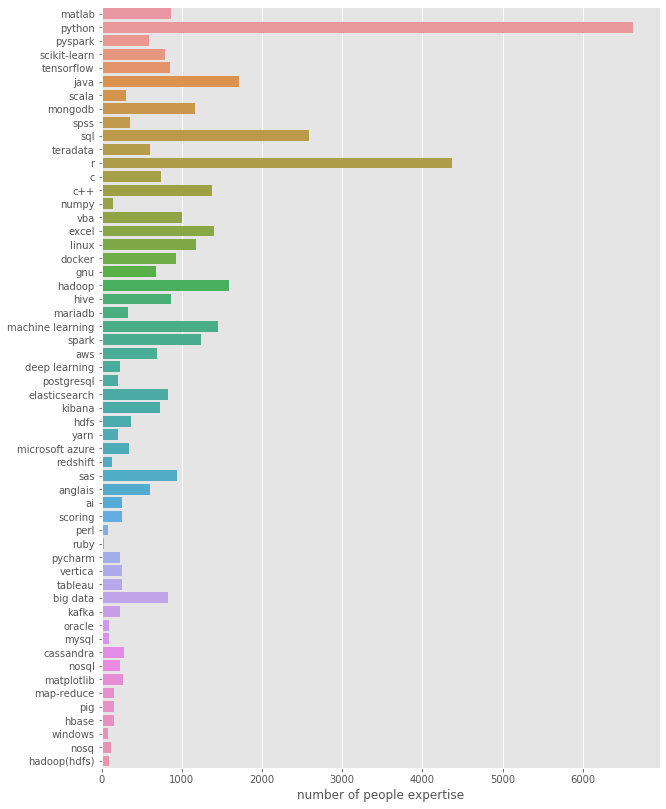

In [48]:
#plotting 
plt.figure(figsize=(10,14))
plt.xlabel('number of people expertise')
sb.barplot(y=list(key), x=list(value))

### Réaliser une méthode de clustering non supervisée pour avoir 2 clusters :

Pour le clustering, on doit remplir les valeurs manquantes dans *Experience* et convertir les features catégorielles *Metier* and *Technologies* en des valeurs numériques.

####  Gestion des valeurs manquantes d'expérience pour "Data architecte" and "Lead data scientist":

In [49]:
# nombre de valeurs manquantes d'expérience pour Data architecte and Lead data scientist
print(df[df['Metier'] == 'Data architecte']['Experience'].isnull().sum())
print(df[df['Metier'] == 'Lead data scientist']['Experience'].isnull().sum())

23
19


In [50]:
# remplissage des valeurs manquantes d'expérience pour Data architecte par moyen
data_architecte = df.loc[df['Metier'] == 'Data architecte'].copy()
data_architecte['Experience'].fillna(data_architecte['Experience'].mean(), inplace= True)
df[df['Metier'] == 'Data architecte'] = data_architecte

In [51]:
# remplissage des valeurs manquantes d'expérience pour Lead data scientist par moyen
lead_data_scientist= df.loc[df['Metier'] == 'Lead data scientist'].copy()
lead_data_scientist['Experience'].fillna(lead_data_scientist['Experience'].mean(), inplace= True)
df[df['Metier'] == 'Lead data scientist'] = lead_data_scientist

In [52]:
df.isnull().sum()

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience       0
Ville            0
Exp_label       42
dtype: int64

### Conversion de la variable diplôme en une variable numérique

On veut mettre des poids au niveau de l'éducation alors on a décidé de définir une fonction pondérée au lieu d'utiliser Onehotencoder ou Labelencoder.

In [53]:
# écrire une fonction pour créer une colonne d'éducation pondérée (à valeurs numériques), de 1 à 2 
# de 1= pas de diplôme, 2 = Ph.D. etc.
def weighted_edu(x):
    if x == 'Bachelor':
        return 1.2
    elif x == 'Master' :
        return 1.5
    elif x == 'Phd':
        return 2
    else:
        return 1


In [54]:
# ajouter la feature Diplome_ranking au dataframe 
df['Diplome_ranking'] = df['Diplome'].apply(weighted_edu)

In [55]:
df.head(5)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label,Diplome_ranking
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,Débutant,1.5
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,avancé,1.5
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,avancé,1.5
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,confirmé,1.5
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,confirmé,2.0


In [56]:
df.isnull().sum()

Entreprise         17
Metier             19
Technologies        0
Diplome             0
Experience          0
Ville               0
Exp_label          42
Diplome_ranking     0
dtype: int64

### Création de nouvelles features

#### Première feature:

On a vu que quelques technologies sont plus communes pour des gens qui travaillent en data science. On va sélectionner les 20 technologies les plus utilisées. On va ensuite extraire cimbien technologies les gens maîtrisent (parmi ces 20).


In [57]:
# voir les technologies pour chaque person
display(tech)

['Matlab/Python/Pyspark/Scikit-learn/Tensorflow',
 'Python/Java/Scala/MongoDB',
 'SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-learn',
 'C/C++/Java/Python',
 'Matlab/Python/C++/numpy/Tensorflow/scikit-learn',
 'VBA/Python/Excel/R',
 'Excel/VBA/R/Python/PySpark',
 'Java/C/C++/R/Python',
 'Java/Linux/Docker',
 'Python/Java/Linux/GNU',
 'Hadoop/Hive/SQL/MariaDB',
 'Python/R/machine learning/Excel/VBA/C++',
 'Python/Spark/Hive/Hadoop',
 'Python/AWS/Docker',
 'Python/Tensorflow/scikit-learn/Deep learning/R',
 'Python/Pyspark/Spark',
 'C/C++/Java/Python',
 'Python/Tensorflow/scikit-learn/Deep learning/R',
 'Python/Pyspark/Spark',
 'Docker/PostgreSQL/Elasticsearch/Kibana/MongoDB',
 'R/machine learning/Excel/VBA',
 'Elasticsearch/Kibana/MongoDB',
 'Python/Spark/Hive/Hadoop',
 'Python/Tensorflow/scikit-learn/Deep learning/R',
 'Java/Hadoop/HDFS/Yarn',
 'Python/Pyspark/machine learning/Microsoft Azure',
 'Python/Pyspark/Spark',
 'Elasticsearch/Kibana/Redshift',
 'SAS/Teradata/SQL/R/Python/Machin

Extraction des 20 technologies les plus communes. Chaque élément de la liste est un couple (technologie, nombre de fois qu'elle est mentionnée).

In [58]:
# extraction des 20 technologies
most_common_tech_num = sorted_counts[0:20]

# calcul du premier élément de chaque couple
most_common_tech = [techno[0] for techno in most_common_tech_num]

In [59]:
# affichage des 20 technologies les plus communes
most_common_tech

['python',
 'r',
 'sql',
 'java',
 'hadoop',
 'machine learning',
 'excel',
 'c++',
 'spark',
 'linux',
 'mongodb',
 'vba',
 'sas',
 'docker',
 'matlab',
 'hive',
 'tensorflow',
 'elasticsearch',
 'big data',
 'scikit-learn']

On crée une nouvelle liste d'éléments de 'tech'. C'est une liste de listes: chaque élément est la liste que chaque personne maîtrise.

In [60]:
# création de la liste d'éléments de 'tech'
lst_tech = []
for el in tech:
    skills = el.split('/')
    skills = [i.lower() for i in skills]
    lst_tech.append(skills) 
    #element = el.split(',')
print(lst_tech)

[['matlab', 'python', 'pyspark', 'scikit-learn', 'tensorflow'], ['python', 'java', 'scala', 'mongodb'], ['spss', 'sql', 'teradata', 'r', 'python', 'tensorflow', 'scikit-learn'], ['c', 'c++', 'java', 'python'], ['matlab', 'python', 'c++', 'numpy', 'tensorflow', 'scikit-learn'], ['vba', 'python', 'excel', 'r'], ['excel', 'vba', 'r', 'python', 'pyspark'], ['java', 'c', 'c++', 'r', 'python'], ['java', 'linux', 'docker'], ['python', 'java', 'linux', 'gnu'], ['hadoop', 'hive', 'sql', 'mariadb'], ['python', 'r', 'machine learning', 'excel', 'vba', 'c++'], ['python', 'spark', 'hive', 'hadoop'], ['python', 'aws', 'docker'], ['python', 'tensorflow', 'scikit-learn', 'deep learning', 'r'], ['python', 'pyspark', 'spark'], ['c', 'c++', 'java', 'python'], ['python', 'tensorflow', 'scikit-learn', 'deep learning', 'r'], ['python', 'pyspark', 'spark'], ['docker', 'postgresql', 'elasticsearch', 'kibana', 'mongodb'], ['r', 'machine learning', 'excel', 'vba'], ['elasticsearch', 'kibana', 'mongodb'], ['pyth

In [61]:
# calcul du nombre de technologies parmi les 20 les plus communes
count_lst_tech = []
for ls in lst_tech:
    intersection_set = list(set.intersection(set(ls), set(most_common_tech)))
    count_lst_tech.append(len(intersection_set))

In [62]:
count_lst_tech

[4,
 3,
 5,
 3,
 5,
 4,
 4,
 4,
 3,
 3,
 3,
 6,
 4,
 2,
 4,
 2,
 3,
 4,
 2,
 3,
 4,
 2,
 4,
 4,
 2,
 2,
 2,
 1,
 5,
 5,
 4,
 3,
 2,
 3,
 5,
 6,
 2,
 2,
 5,
 4,
 2,
 4,
 5,
 4,
 4,
 5,
 2,
 3,
 4,
 3,
 3,
 3,
 5,
 4,
 3,
 5,
 2,
 2,
 3,
 4,
 3,
 2,
 4,
 2,
 4,
 4,
 3,
 2,
 1,
 4,
 1,
 3,
 2,
 4,
 2,
 2,
 3,
 5,
 5,
 5,
 5,
 5,
 2,
 2,
 3,
 4,
 4,
 2,
 2,
 4,
 4,
 4,
 4,
 6,
 5,
 4,
 6,
 1,
 3,
 5,
 3,
 3,
 1,
 5,
 5,
 4,
 3,
 4,
 4,
 2,
 4,
 5,
 1,
 3,
 5,
 2,
 1,
 2,
 4,
 1,
 3,
 4,
 4,
 2,
 3,
 5,
 3,
 2,
 3,
 2,
 4,
 2,
 4,
 3,
 5,
 4,
 3,
 4,
 2,
 5,
 4,
 2,
 2,
 4,
 4,
 3,
 5,
 5,
 6,
 3,
 5,
 5,
 4,
 5,
 2,
 4,
 3,
 3,
 2,
 2,
 3,
 4,
 2,
 4,
 4,
 4,
 4,
 1,
 2,
 3,
 3,
 5,
 4,
 2,
 3,
 3,
 4,
 4,
 3,
 1,
 4,
 3,
 4,
 4,
 2,
 3,
 2,
 6,
 5,
 4,
 3,
 2,
 3,
 3,
 5,
 3,
 2,
 2,
 5,
 4,
 4,
 5,
 4,
 2,
 4,
 6,
 4,
 1,
 2,
 5,
 2,
 1,
 2,
 2,
 5,
 3,
 3,
 2,
 1,
 4,
 2,
 4,
 4,
 3,
 4,
 4,
 3,
 5,
 4,
 5,
 4,
 3,
 4,
 2,
 4,
 5,
 4,
 4,
 5,
 3,
 3,
 2,
 1,
 4,
 4,
 5,
 3,
 5,
 3,
 3,


In [63]:
# Créer un dataframe de la liste "count_lst_tech"
count_tech = pd.DataFrame(count_lst_tech, index = df.index, columns = ['Number_of_most_common_tech'])

In [64]:
count_tech

,Number_of_most_common_tech
0,4
1,3
2,5
3,3
4,5
...,...
9577,4
9578,5
9579,4
9580,2


In [65]:
# on ajoute la colonne du nombre de technologies usuelles aux données
data = df.join(count_tech)

In [66]:
# vérification
data.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label,Diplome_ranking,Number_of_most_common_tech
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,Débutant,1.5,4
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,avancé,1.5,3
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,avancé,1.5,5
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,confirmé,1.5,3
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,confirmé,2.0,5


#### Seconde et troisième nouvelles features:

On crée deux features. La première, **weighted_experience** est la racine carrée de l'expérience pondérée par le coefficient du diplôme (fonctionnalité 'Diplome_ranking'). Concrètement, pour avoir une valeur autour de 2,5, il faut être:
- sans diplôme avec 5 ans d'expérience
- licence avec 3,5 ans d'expérience
- master avec 2 ans d'expérience
- Ph.D. avec 6 mois d'expérience

Pourquoi la racine carrée? car on renormalise quand l'expérience est grande. Par exemple, pour avoir une valeur autour de 4, il faut être 
- sans diplôme avec 15 ans d'expérience
- licence avec 10 ans d'expérience
- master avec 6 ans d'expérience
- Ph.D. avec 3 ans d'expérience

La seconde feature , **Evaluation**, est obtenue en faisant une somme entre le niveau de connaissance (pondéré par le diplôme) et l'expérience. Un bon score correspond à une personne qui est soit très expérimentée, soit avec beaucoup de connaissances (soit directes, soit provenant de son diplôme). Cette fois on valorise plus l'expérience. Les gens ayant soit  
- des connaissances et un bon diplôme 
- beaucoup de connaissances
- beaucoup d'expérience

ont une bonne évaluation.

In [67]:
# définir les nouvelles features
data['Weighted_experience'] = ((1+data['Experience']).pow(1./2))*data['Diplome_ranking']
data['Evaluation'] = data['Diplome_ranking']*data['Number_of_most_common_tech'] + data['Experience']

In [68]:
data.head(5)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label,Diplome_ranking,Number_of_most_common_tech,Weighted_experience,Evaluation
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,Débutant,1.5,4,2.121320,7.0
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,avancé,1.5,3,3.000000,7.5
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,avancé,1.5,5,3.000000,10.5
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,confirmé,1.5,3,2.371708,6.0
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,confirmé,2.0,5,3.464102,12.0


#### Gérer et convertir les valeurs manquantes de "Metier": 

##### Valeurs manquantes pour "Metier":

In [69]:
# imputation de valeurs manquantes pour une variable catégorielle  "Metier" utilise SimpleImputer
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy='most_frequent')
metier_imputed = pd.DataFrame(cat_imputer.fit_transform(data['Metier'].values.reshape(-1,1)), 
                              index = data.index, columns = ['Metier_imputed'])

In [70]:
metier_imputed.isnull().sum()

Metier_imputed    0
dtype: int64

On remplace la feature catégorielle "Metier" par imputed Metier 

In [71]:
# drop Metier de data
data_0 = data.drop('Metier', axis = 1)


In [72]:
# ajouter 'metier_imputed' au dataframe
total_data = data_0.join(metier_imputed)

In [73]:
# voir les donnes apres imputation de quelques features
total_data.head(10)

,Entreprise,Technologies,Diplome,Experience,Ville,Exp_label,Diplome_ranking,Number_of_most_common_tech,Weighted_experience,Evaluation,Metier_imputed
0,Sanofi,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,Débutant,1.5,4,2.121320,7.0,Data scientist
1,Massachusetts General Hospital(MGH),Python/Java/Scala/MongoDB,Master,3.0,Marseille,avancé,1.5,3,3.000000,7.5,Data architecte
2,Delve,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,avancé,1.5,5,3.000000,10.5,Lead data scientist
3,Ann & Robert H. Lurie Children’s Hospital of C...,C/C++/Java/Python,Master,1.5,Marseille,confirmé,1.5,3,2.371708,6.0,Data scientist
4,Arm,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,confirmé,2.0,5,3.464102,12.0,Data scientist
5,S&P Global Ratings,VBA/Python/Excel/R,Master,6.0,Lille,expert,1.5,4,3.968627,12.0,Lead data scientist
6,NVIDIA,Excel/VBA/R/Python/PySpark,Bachelor,0.0,Lille,Débutant,1.2,4,1.200000,4.8,Data scientist
7,Cedars-Sinai Medical Center,Java/C/C++/R/Python,Bachelor,4.0,Toulouse,avancé,1.2,4,2.683282,8.8,Data scientist
8,Fibroblast,Java/Linux/Docker,Bachelor,8.0,Paris,expert,1.2,3,3.600000,11.6,Data architecte
9,General Motors,Python/Java/Linux/GNU,Master,5.0,Toulouse,expert,1.5,3,3.674235,9.5,Data engineer


In [74]:
total_data.isnull().sum()

Entreprise                    17
Technologies                   0
Diplome                        0
Experience                     0
Ville                          0
Exp_label                     42
Diplome_ranking                0
Number_of_most_common_tech     0
Weighted_experience            0
Evaluation                     0
Metier_imputed                 0
dtype: int64

#### Labellisation des valeurs catégoriques pour "Metier":

Comme il n'y a que 4 valeurs pour les valeurs de "Metier" et qu'il n'y a aucun risque de useen data(dans le reste des questions), on utilise Labelencoder()

In [75]:
# appliquer LabelEncoder()
from sklearn.preprocessing import LabelEncoder

label_encoder_0 = LabelEncoder()

# fit et tranform à tota_data
enc_metier = label_encoder_0.fit_transform(total_data['Metier_imputed'])

# création du dataframe  avec Encoded Metier et l'appelle "Metier_enc"
dt_enc_metier = pd.DataFrame(enc_metier, index = total_data.index,  columns = ['Metier_enc'])

# ajout de Metier_enc aux données
total_data = total_data.drop('Metier_imputed', axis =1).join(dt_enc_metier)

In [76]:
total_data

,Entreprise,Technologies,Diplome,Experience,Ville,Exp_label,Diplome_ranking,Number_of_most_common_tech,Weighted_experience,Evaluation,Metier_enc
0,Sanofi,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,Débutant,1.5,4,2.121320,7.0,2
1,Massachusetts General Hospital(MGH),Python/Java/Scala/MongoDB,Master,3.0,Marseille,avancé,1.5,3,3.000000,7.5,0
2,Delve,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,avancé,1.5,5,3.000000,10.5,3
3,Ann & Robert H. Lurie Children’s Hospital of C...,C/C++/Java/Python,Master,1.5,Marseille,confirmé,1.5,3,2.371708,6.0,2
4,Arm,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,confirmé,2.0,5,3.464102,12.0,2
...,...,...,...,...,...,...,...,...,...,...,...
9577,Massachusetts General Hospital(MGH),C++/R/Python/Matlab/Matplotlib,Master,1.5,Lyon,confirmé,1.5,4,2.371708,7.5,2
9578,Charles River Analytics,Excel/Python/Matlab/R/machine learning/anglais,Master,11.0,Toulouse,expert,1.5,5,5.196152,18.5,2
9579,Ball Aerospace,R/machine learning/Excel/VBA,Master,1.0,Paris,Débutant,1.5,4,2.121320,7.0,2
9580,Takeda Pharmaceutical,Python/Pyspark/machine learning/Microsoft Azure,Master,17.0,Rennes,expert,1.5,2,6.363961,20.0,2


In [77]:
total_data.isnull().sum()

Entreprise                    17
Technologies                   0
Diplome                        0
Experience                     0
Ville                          0
Exp_label                     42
Diplome_ranking                0
Number_of_most_common_tech     0
Weighted_experience            0
Evaluation                     0
Metier_enc                     0
dtype: int64

## Clustering:

Pour cette partir, on va faire 2 types de clustering. Le premier type est basé sur le niveau de qualification global (la feature 'Evaluation'), le second est basé sur les technologies que les gens connaissent.

#### Premier type de clustering

Pour le clustering, je garde les features numériques 'Evaluation' et 'weighted_experience'.

In [78]:
# on prend ces 2 features
new_data = total_data[['Evaluation', 'Weighted_experience']]

In [79]:
new_data.head(5)

,Evaluation,Weighted_experience
0,7.0,2.121320
1,7.5,3.000000
2,10.5,3.000000
3,6.0,2.371708
4,12.0,3.464102


In [80]:
# import librairie KMeans
from sklearn.cluster import KMeans

# calcul des clusters avec Kmeans avec 2 cluster
clusterer = KMeans(n_clusters = 2, random_state=0)
clusterer.fit(new_data)
pred = clusterer.predict(new_data)


Les méthodes qu'on peut évaluer nos clusters sont la «Elbow method» ou «méthode de silhouette». On utilise la méthode de silhouette pour évaluer notre travail. Pour calculer le score de silhouette, on dois calculer les coefficients de  silhouette pour chaque point de données, l'appeler $s(i)$, puis on dois prendre la moyenne de tous les $s(i)$ pour chaque cluster. La valeur du coefficient de silhouette est dans l'intervalle $[- 1,1]$. Le nombre proche de 1 montre que le cluster est bien séparé.

In [81]:
from sklearn.metrics import silhouette_score
score = silhouette_score(new_data, pred)

On évalue la performance de l'algorithme avec la méthode de la Silhouette.

In [82]:
score

0.5289341052024666

#### Visualisation des données et des clusters

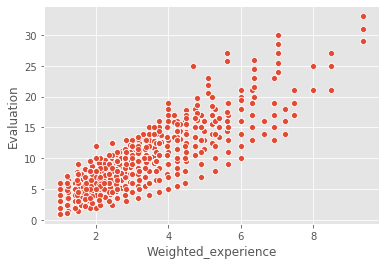

In [83]:
# Visualisation de données avec scatterplot
sb.scatterplot(x = new_data['Weighted_experience'], y = new_data['Evaluation'])

Text(0, 0.5, 'Evaluation')

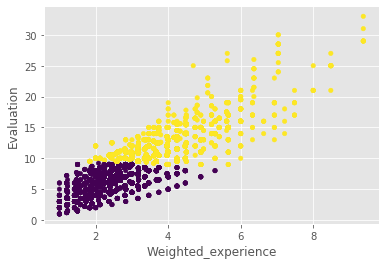

In [84]:
# sur la base de notre prédiction de KMeans, on peut dessiner nos deux groupes
#avec deux couleurs différentes 
plt.scatter(new_data['Weighted_experience'], new_data['Evaluation'],
            c = pred, s = 20, cmap = 'viridis')
plt.xlabel('Weighted_experience')
plt.ylabel('Evaluation')

Le cluster sépare le nuage de points en 2 parties selon la valeur de la feature 'Evaluation' que j'ai crée (au dessus ou en dessous de 10). Malheureusement les 2 clusters ne sont pas vraiment distincts. 

Cluster jaune : ce sont les gens les mieux qualifiés : soint avec une grande expérience, ou un bon diplôme combiné à suffisamment de connaissances. La valeur de la features 'Evaluation' est entre 10 et 15.

Cluster violet :  personnes comparativement moins qualifiées : en pratique une expérience (pondérée par le diplôme) autour de 2, et la features 'Evaluation' valant en moyenne autour de 5.

#### Second type de clustering

Le second type de clustering est basé sur les technologies. 

In [85]:
# convertir les technologies en minuscule
tot_data = total_data.copy()
tot_data['Technologies'] = tot_data['Technologies'].str.lower() 

In [86]:
tot_data.head(5)

,Entreprise,Technologies,Diplome,Experience,Ville,Exp_label,Diplome_ranking,Number_of_most_common_tech,Weighted_experience,Evaluation,Metier_enc
0,Sanofi,matlab/python/pyspark/scikit-learn/tensorflow,Master,1.0,Paris,Débutant,1.5,4,2.121320,7.0,2
1,Massachusetts General Hospital(MGH),python/java/scala/mongodb,Master,3.0,Marseille,avancé,1.5,3,3.000000,7.5,0
2,Delve,spss/sql/teradata/r/python/tensorflow/scikit-l...,Master,3.0,Nantes,avancé,1.5,5,3.000000,10.5,3
3,Ann & Robert H. Lurie Children’s Hospital of C...,c/c++/java/python,Master,1.5,Marseille,confirmé,1.5,3,2.371708,6.0,2
4,Arm,matlab/python/c++/numpy/tensorflow/scikit-learn,Phd,2.0,Bordeaux,confirmé,2.0,5,3.464102,12.0,2


We separate the technologoies to different features using get.dummies.

In [87]:
# on utilise get.dummies pour créer différentes features pour chaque technologie
tot_data_dum = tot_data['Technologies'].str.get_dummies(sep='/').add_prefix('col_')

In [88]:
tot_data_dum

,col_ai,col_anglais,col_aws,col_big data,col_c,col_c++,col_cassandra,col_deep learning,col_docker,col_elasticsearch,...,col_spark,col_spss,col_sql,col_tableau,col_tensorflow,col_teradata,col_vba,col_vertica,col_windows,col_yarn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9577,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9578,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


On choisit les valeurs numériques du dataframe principal, i.e. total_data.

In [89]:
# choisir les colonnes numerique de 'total data'
num_total_data = total_data[['Experience', 'Diplome_ranking',
                  'Number_of_most_common_tech', 'Weighted_experience', 'Evaluation', 'Metier_enc']]

In [90]:
num_total_data.head()

,Experience,Diplome_ranking,Number_of_most_common_tech,Weighted_experience,Evaluation,Metier_enc
0,1.0,1.5,4,2.121320,7.0,2
1,3.0,1.5,3,3.000000,7.5,0
2,3.0,1.5,5,3.000000,10.5,3
3,1.5,1.5,3,2.371708,6.0,2
4,2.0,2.0,5,3.464102,12.0,2


Maintenant on concatène les dataframes crées par chaque technologie avec les  données numériques et labellisées qu'on a.

In [91]:
result = pd.concat([num_total_data, tot_data_dum], axis = 1)

In [92]:
result

,Experience,Diplome_ranking,Number_of_most_common_tech,Weighted_experience,Evaluation,Metier_enc,col_ai,col_anglais,col_aws,col_big data,...,col_spark,col_spss,col_sql,col_tableau,col_tensorflow,col_teradata,col_vba,col_vertica,col_windows,col_yarn
0,1.0,1.5,4,2.121320,7.0,2,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3.0,1.5,3,3.000000,7.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1.5,5,3.000000,10.5,3,0,0,0,0,...,0,1,1,0,1,1,0,0,0,0
3,1.5,1.5,3,2.371708,6.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,5,3.464102,12.0,2,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9577,1.5,1.5,4,2.371708,7.5,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9578,11.0,1.5,5,5.196152,18.5,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9579,1.0,1.5,4,2.121320,7.0,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9580,17.0,1.5,2,6.363961,20.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
result.shape

(9582, 62)

La dimension des données est vraiment grande, on peut donc utiliser PCA pour réduire les dimensions. Cela peut être vraiment utile pour visualiser les données pour le clustering.

In [94]:
# implementation de pca
from sklearn.decomposition import PCA

# on choisi 10 dimension
pca_10 = PCA(n_components = 10)
pca_10.fit(result)



PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [95]:
# on utilise "explained_variance_ratio_" pour voir les pourcentages de variance des donnnées pour chaque dimension
explained_variance = pca_10.explained_variance_ratio_

In [96]:
explained_variance

array([0.69477248, 0.15265012, 0.02182062, 0.01751254, 0.01389329,
       0.01256488, 0.00882521, 0.00866884, 0.0072857 , 0.00651309])

Avec les 2 premières dimensions, on a environ 85% de variance.

Maintenant on peut utiliser PCA pour voir quelles features ont la variance la plus grande.

On peut donc garder 2 dimensions pour notre problème. Chacune de ses dimensions est une combinaison linéaire des autres features.

In [97]:
# implementation de pca pour 2 dimensions et transformation des données
pca_2 = PCA(n_components = 2)
pca_2.fit(result)
dim_2 = pca_2.transform(result)
dim_2_data = pd.DataFrame(np.round(dim_2,4), columns = ['dim1', 'dim2'])

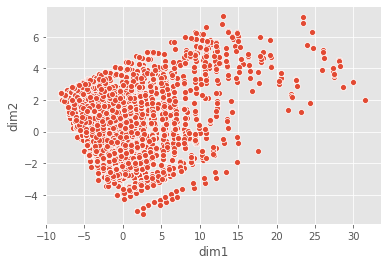

In [98]:
sb.scatterplot(x= dim_2_data['dim1'], y = dim_2_data['dim2'])

Nous sommes maintenant prêts à clusteriser avec 2 clusters.

In [99]:
# determination des clusters 
from sklearn.cluster import KMeans

clusterer_1 = KMeans(n_clusters = 2)
clusterer_1.fit(dim_2_data)
pred_1 = clusterer_1.predict(dim_2_data)

In [100]:
from sklearn.metrics import silhouette_score
score1 = silhouette_score(dim_2_data, pred_1)

In [101]:
score1

0.46858633098865143

#### Visulasation des clsuters et leur centres

Text(0, 0.5, 'dim2')

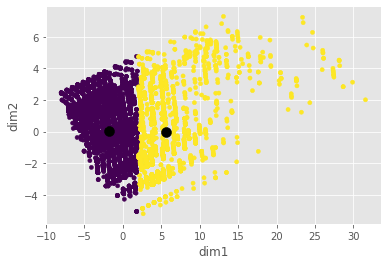

In [102]:
plt.scatter(dim_2_data['dim1'], dim_2_data['dim2'], c = pred_1, s = 17, cmap = 'viridis')

# trouver le centre de chaque cluster
centers = clusterer_1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=1)
plt.xlabel('dim1')
plt.ylabel('dim2')

In [103]:
print(centers)

[[-1.79846356e+00  3.57560204e-03]
 [ 5.64555421e+00 -1.12280778e-02]]


Il faut maintenant trouver les vraies valeurs des centres.

In [104]:
# appliquer inverse_transform pour trouver les valeurs des centres
inverse_trans = pca_2.inverse_transform(centers)

# afficher les centres
group = ['group{}'.format(i) for i in range(1,3)]
data_centers = pd.DataFrame(np.round(inverse_trans), columns = result.keys())
data_centers.index = group
display(data_centers)

,Experience,Diplome_ranking,Number_of_most_common_tech,Weighted_experience,Evaluation,Metier_enc,col_ai,col_anglais,col_aws,col_big data,...,col_spark,col_spss,col_sql,col_tableau,col_tensorflow,col_teradata,col_vba,col_vertica,col_windows,col_yarn
group1,2.0,1.0,3.0,2.0,7.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
group2,6.0,2.0,4.0,4.0,13.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Pour analyser nos groupes, on va voir quels groupes de gens utilisent quels types de technologies.

#### Trouver les technologies les plus communes pour chaque métier:

##### Technologies les plus communes pour les data scientist.

In [105]:
# liste des technologies utilisées pour les data scientist
data_scientist_tech = data_scientist['Technologies'].to_list()

# faire un dictionnaire pour chaque technologies et nombre de technologies
counts_data_sci = dict()
for i in data_scientist_tech:
    skills = i.split('/')
    skills = [i.lower() for i in skills]
    for skill in skills:
        counts_data_sci[skill] = counts_data_sci.get(skill,0)+1

In [106]:
# trier les valeurs du plus grand nombre au plus petit
sorted_counts_data_sci = sorted(counts_data_sci.items(), key=lambda x: x[1], reverse=True)
print(sorted_counts_data_sci) 

[('python', 3274), ('r', 3268), ('sql', 1370), ('excel', 1158), ('machine learning', 1085), ('c++', 880), ('vba', 819), ('tensorflow', 727), ('matlab', 713), ('scikit-learn', 674), ('sas', 672), ('big data', 548), ('spark', 387), ('teradata', 381), ('anglais', 373), ('c', 359), ('pyspark', 352), ('', 317), ('spss', 313), ('microsoft azure', 271), ('hadoop', 245), ('matplotlib', 225), ('ai', 223), ('scoring', 223), ('java', 216), ('deep learning', 212), ('pycharm', 192), ('numpy', 119), ('nosql', 79), ('mongodb', 79), ('hive', 50)]


In [107]:
most_common_data_sci = ['r','python','sql','excel', 'machine learning']

##### Technologies les plus communes pour les data engineer.

In [108]:
# liste des technologies utilisées pour les data engineer.
data_engineer_tech = data_engineer['Technologies'].to_list()

counts_data_eng = dict()
for i in data_engineer_tech:
    skills = i.split('/')
    skills = [i.lower() for i in skills]
    for skill in skills:
        counts_data_eng[skill] = counts_data_eng.get(skill,0)+1

In [109]:
sorted_counts_data_eng = sorted(counts_data_eng.items(), key=lambda x: x[1], reverse=True)
print(sorted_counts_data_eng) 

[('python', 1181), ('linux', 822), ('java', 794), ('mongodb', 596), ('gnu', 562), ('spark', 544), ('hadoop', 516), ('docker', 515), ('elasticsearch', 414), ('kibana', 414), ('hdfs', 360), ('mariadb', 335), ('hive', 276), ('sql', 276), ('postgresql', 208), ('yarn', 206), ('c', 204), ('c++', 204), ('scala', 173), ('pyspark', 171), ('map-reduce', 154), ('pig', 154), ('hbase', 154), ('cassandra', 154), ('nosq', 123), ('oracle', 94), ('mysql', 94), ('aws', 72), ('perl', 34), ('ruby', 34)]


In [110]:
most_common_data_eng = ['python', 'java', 'linux', 'mongodb', 'gnu']

##### Technologies les plus communes pour les lead data scientist.

In [111]:
# liste des technologies utilisées pour les lead data scientist
lead_data_scientist_tech = lead_data_scientist['Technologies'].to_list()

counts_lead_data = dict()
for i in lead_data_scientist_tech:
    skills = i.split('/')
    skills = [i.lower() for i in skills]
    for skill in skills:
        counts_lead_data[skill] = counts_lead_data.get(skill,0)+1

In [112]:
sorted_lead_data = sorted(counts_lead_data.items(), key=lambda x: x[1], reverse=True)
print(sorted_lead_data) 

[('python', 1132), ('r', 1095), ('sql', 729), ('machine learning', 363), ('big data', 276), ('sas', 267), ('excel', 236), ('teradata', 226), ('anglais', 226), ('', 222), ('c++', 204), ('vba', 181), ('hadoop', 178), ('hive', 163), ('matlab', 157), ('tensorflow', 120), ('scikit-learn', 114), ('c', 85), ('pyspark', 69), ('microsoft azure', 66), ('spark', 57), ('matplotlib', 48), ('spss', 46), ('java', 46), ('pycharm', 42), ('ai', 27), ('scoring', 27), ('nosql', 24), ('mongodb', 24), ('numpy', 21), ('deep learning', 14)]


In [113]:
most_common_lead_data = ['python', 'r', 'sql', 'machine learning', 'big data']

##### Technologies les plus communes pour les data architectes.

In [114]:
# liste des technologies utilisées pour les data architectes
data_architecte_tech = data_architecte['Technologies'].to_list()

counts_data_arch = dict()
for i in data_architecte_tech:
    skills = i.split('/')
    skills = [i.lower() for i in skills]
    for skill in skills:
        counts_data_arch[skill] = counts_data_arch.get(skill,0)+1

In [115]:
sorted_data_arch = sorted(counts_data_arch.items(), key=lambda x: x[1], reverse=True)
print(sorted_data_arch) 

[('python', 1025), ('java', 662), ('hadoop', 646), ('aws', 618), ('mongodb', 466), ('docker', 412), ('elasticsearch', 412), ('hive', 372), ('linux', 359), ('kibana', 314), ('spark', 249), ('vertica', 247), ('tableau', 247), ('kafka', 235), ('sql', 201), ('scala', 137), ('cassandra', 128), ('nosql', 128), ('redshift', 124), ('gnu', 114), ('hadoop(hdfs)', 98), ('c', 90), ('c++', 90), ('windows', 75), ('perl', 39)]


In [116]:
most_common_data_arch = ['python', 'java', 'hadoop', 'aws', 'mongodb']

Maintenant, on prend une union des 5 technologies les plus utilisées pour chaque métier:

In [117]:
def union(a, b, c, d):
    return list(set(a) | set(b) | set(c) | set(d))

In [118]:
union(most_common_data_arch, most_common_lead_data, most_common_data_eng, most_common_data_sci)

['hadoop',
 'sql',
 'big data',
 'aws',
 'mongodb',
 'machine learning',
 'r',
 'excel',
 'java',
 'linux',
 'gnu',
 'python']

On crée un dataframe dont les colonnes sont l'union pour chaque métier des 5 technologies les plus utilisées pour ce métier.

On extrait les technologies correspondant à chaque groupe de Cluster.

In [119]:
# data_centers pour les technologies communes
data_centers[['col_linux', 'col_excel',
              'col_mongodb', 'col_python','col_big data', 'col_aws', 
              'col_gnu', 'col_r', 'col_machine learning', 'col_sql', 'col_hadoop', 'col_java']]

,col_linux,col_excel,col_mongodb,col_python,col_big data,col_aws,col_gnu,col_r,col_machine learning,col_sql,col_hadoop,col_java
group1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
group2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [120]:
# data_centers pour les autres colonnes
data_centers[['Experience', 'Diplome_ranking',
                  'Number_of_most_common_tech', 'Weighted_experience', 'Evaluation', 'Metier_enc']]

,Experience,Diplome_ranking,Number_of_most_common_tech,Weighted_experience,Evaluation,Metier_enc
group1,2.0,1.0,3.0,2.0,7.0,1.0
group2,6.0,2.0,4.0,4.0,13.0,2.0


En regardant les 2 dernières tables, on voit que:

- Le premier cluster représente les personnes avec haut level d'éducation (diplome_rankig = 2) et grande expérience, qui sont probablement data scientists ou lead data scientists (Metier_enc =2). Ils utilisent Python et R comme 5 premières technologies

- Le second cluster représente les gens avec un niveau d'éducation faible (diplome_rankig = 1) et qui connaissent beaucoup de technologies, mais qui n'ont pas l'expertise usuelle des data scientist. Ce sont probablement des data engineer ou data architectes qui ont peu d'expérience (Metier_enc = 1). 

Pour chaque métier, on peut regarder le **niveau d'éducation** correspondant.

#### Data scienist

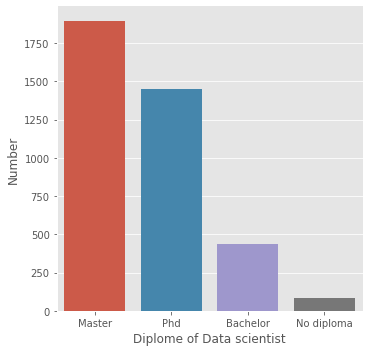

In [121]:
# répartition du niveau d'éducation pour les data scientist
sb.catplot(x='Diplome',kind='count',data=data_scientist)
plt.xlabel("Diplome of Data scientist")
plt.ylabel("Number")
plt.show()

#### Data engineer

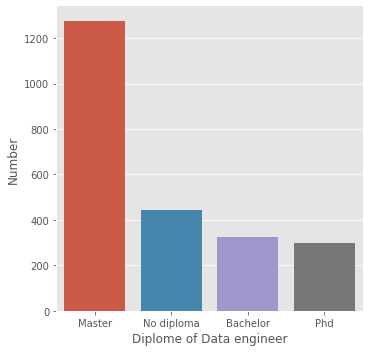

In [122]:
sb.catplot(x='Diplome',kind='count',data=data_engineer)
plt.xlabel("Diplome of Data engineer")
plt.ylabel("Number")
plt.show()

#### Lead data scientist

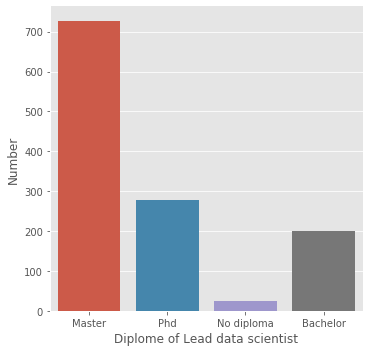

In [123]:
lead_data_scientist = df.loc[df['Metier'] == 'Lead data scientist']
sb.catplot(x='Diplome',kind='count',data=lead_data_scientist)
plt.xlabel("Diplome of Lead data scientist")
plt.ylabel("Number")
plt.show()

#### Data architecte

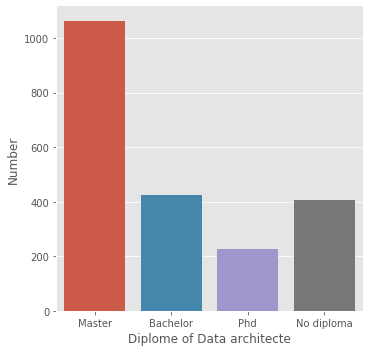

In [124]:
data_architecte = df.loc[df['Metier'] == 'Data architecte']
sb.catplot(x='Diplome',kind='count', data=data_architecte)
plt.xlabel("Diplome of Data architecte")
plt.ylabel("Number")
plt.show()

## A prediction of profiles whose jobs are not labelled

### Réaliser la prédiction des métiers manquants dans la base de données :

On réunit le dataframe "data" (dont la colonne Métier n'est pas imputée) et le dataframe qui inclut chaque technologie dans une feature.

In [125]:
#concatenate "data" et "tot_data_dum" 
result_data = pd.concat([data, tot_data_dum], axis =1)

In [126]:
result_data

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label,Diplome_ranking,Number_of_most_common_tech,Weighted_experience,...,col_spark,col_spss,col_sql,col_tableau,col_tensorflow,col_teradata,col_vba,col_vertica,col_windows,col_yarn
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,Débutant,1.5,4,2.121320,...,0,0,0,0,1,0,0,0,0,0
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,avancé,1.5,3,3.000000,...,0,0,0,0,0,0,0,0,0,0
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,avancé,1.5,5,3.000000,...,0,1,1,0,1,1,0,0,0,0
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,confirmé,1.5,3,2.371708,...,0,0,0,0,0,0,0,0,0,0
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,confirmé,2.0,5,3.464102,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9577,Massachusetts General Hospital(MGH),Data scientist,C++/R/Python/Matlab/Matplotlib,Master,1.5,Lyon,confirmé,1.5,4,2.371708,...,0,0,0,0,0,0,0,0,0,0
9578,Charles River Analytics,Data scientist,Excel/Python/Matlab/R/machine learning/anglais,Master,11.0,Toulouse,expert,1.5,5,5.196152,...,0,0,0,0,0,0,0,0,0,0
9579,Ball Aerospace,Data scientist,R/machine learning/Excel/VBA,Master,1.0,Paris,Débutant,1.5,4,2.121320,...,0,0,0,0,0,0,1,0,0,0
9580,Takeda Pharmaceutical,Data scientist,Python/Pyspark/machine learning/Microsoft Azure,Master,17.0,Rennes,expert,1.5,2,6.363961,...,0,0,0,0,0,0,0,0,0,0


In [127]:
result_data.columns

Index(['Entreprise', 'Metier', 'Technologies', 'Diplome', 'Experience',
       'Ville', 'Exp_label', 'Diplome_ranking', 'Number_of_most_common_tech',
       'Weighted_experience', 'Evaluation', 'col_ai', 'col_anglais', 'col_aws',
       'col_big data', 'col_c', 'col_c++', 'col_cassandra',
       'col_deep learning', 'col_docker', 'col_elasticsearch', 'col_excel',
       'col_gnu', 'col_hadoop', 'col_hadoop(hdfs)', 'col_hbase', 'col_hdfs',
       'col_hive', 'col_java', 'col_kafka', 'col_kibana', 'col_linux',
       'col_machine learning', 'col_map-reduce', 'col_mariadb', 'col_matlab',
       'col_matplotlib', 'col_microsoft azure', 'col_mongodb', 'col_mysql',
       'col_nosq', 'col_nosql', 'col_numpy', 'col_oracle', 'col_perl',
       'col_pig', 'col_postgresql', 'col_pycharm', 'col_pyspark', 'col_python',
       'col_r', 'col_redshift', 'col_ruby', 'col_sas', 'col_scala',
       'col_scikit-learn', 'col_scoring', 'col_spark', 'col_spss', 'col_sql',
       'col_tableau', 'col_tensorfl

Pour prédire les métier manquants, on considère le problème comme un problème de machine learning supervisé, et plus précisément un problème de classification multiple. On peut séparer les données en deux parties, le training set (sans valeurs manquantes dans 'Metier'), et le test set qui lui a des valeurs manquantes dans 'Metier'. Les données qu'on utilise est le dataset **data** dont les valeurs manquantes de 'Metier' sont non remplies, et auxquelles les nouvelles features que nous avont crées sont ajoutées.

In [128]:
# valeurs manquantes du dataset data
result_data.isnull().sum()

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience       0
                ..
col_teradata     0
col_vba          0
col_vertica      0
col_windows      0
col_yarn         0
Length: 67, dtype: int64

On trouve les valeurs manquantes de 'Metier' dans le dataframe et on met les data correspondant à ce métier manquant dans le test set.

In [129]:
# valeurs manquantes de 'Métier'
Missing_metier = result_data[result_data['Metier'].isnull()]

In [130]:
Missing_metier

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label,Diplome_ranking,Number_of_most_common_tech,Weighted_experience,...,col_spark,col_spss,col_sql,col_tableau,col_tensorflow,col_teradata,col_vba,col_vertica,col_windows,col_yarn
346,Jacobs,NaN,Python/Spark/GNU/Linux,No diploma,2.5,Paris,confirmé,1.0,3,1.870829,...,1,0,0,0,0,0,0,0,0,0
2058,Ball Aerospace,NaN,VBA/Python/Excel/R,Master,15.0,Lyon,expert,1.5,4,6.000000,...,0,0,0,0,0,0,1,0,0,0
2670,"eHire, LLC",NaN,Java/C/C++/R/Python,Master,1.5,Toulouse,confirmé,1.5,4,2.371708,...,0,0,0,0,0,0,0,0,0,0
2899,Norfolk Southern Corp,NaN,Python/Tensorflow/scikit-learn/Deep learning/R,Phd,0.0,Grenoble,Débutant,2.0,4,2.000000,...,0,0,0,0,1,0,0,0,0,0
3346,J.E. Ranta Associates,NaN,Cassandra/MongoDB/NoSQL/AWS,Master,7.0,Rennes,expert,1.5,1,4.242641,...,0,0,0,0,0,0,0,0,0,0
4248,KPMG,NaN,Python/Microsoft Azure/R/SQL,Phd,2.0,Lyon,confirmé,2.0,3,3.464102,...,0,0,1,0,0,0,0,0,0,0
4290,"Pandora Media, Inc.",NaN,SAS/Teradata/SQL/R/Python/Machine learning/Ang...,Phd,1.5,Toulouse,confirmé,2.0,5,3.162278,...,0,0,1,0,0,1,0,0,0,0
4292,Partners HealthCare(PHS),NaN,SAS/Teradata/SQL/R/Python/Machine learning/Ang...,Master,8.0,Bordeaux,expert,1.5,5,4.500000,...,0,0,1,0,0,1,0,0,0,0
5425,Ashton Lane Group,NaN,Python/Pyspark/Spark,No diploma,5.0,Lyon,expert,1.0,2,2.449490,...,1,0,0,0,0,0,0,0,0,0
5593,Lighthouse Lab Services,NaN,Python/R/machine learning/Excel/VBA/C++,Master,3.0,Lyon,avancé,1.5,6,3.000000,...,0,0,0,0,0,0,1,0,0,0


In [131]:
# extraction de X_test and Y_test du dataset
X_test = Missing_metier.drop('Metier', axis = 1)
Y_test = Missing_metier['Metier'].replace(np.NAN, '', regex=True)

In [132]:
X_test.head(5)

,Entreprise,Technologies,Diplome,Experience,Ville,Exp_label,Diplome_ranking,Number_of_most_common_tech,Weighted_experience,Evaluation,...,col_spark,col_spss,col_sql,col_tableau,col_tensorflow,col_teradata,col_vba,col_vertica,col_windows,col_yarn
346,Jacobs,Python/Spark/GNU/Linux,No diploma,2.5,Paris,confirmé,1.0,3,1.870829,5.5,...,1,0,0,0,0,0,0,0,0,0
2058,Ball Aerospace,VBA/Python/Excel/R,Master,15.0,Lyon,expert,1.5,4,6.000000,21.0,...,0,0,0,0,0,0,1,0,0,0
2670,"eHire, LLC",Java/C/C++/R/Python,Master,1.5,Toulouse,confirmé,1.5,4,2.371708,7.5,...,0,0,0,0,0,0,0,0,0,0
2899,Norfolk Southern Corp,Python/Tensorflow/scikit-learn/Deep learning/R,Phd,0.0,Grenoble,Débutant,2.0,4,2.000000,8.0,...,0,0,0,0,1,0,0,0,0,0
3346,J.E. Ranta Associates,Cassandra/MongoDB/NoSQL/AWS,Master,7.0,Rennes,expert,1.5,1,4.242641,8.5,...,0,0,0,0,0,0,0,0,0,0


In [133]:
Y_test

346     
2058    
2670    
2899    
3346    
4248    
4290    
4292    
5425    
5593    
5712    
6024    
6625    
7091    
7228    
7330    
9087    
9427    
9490    
Name: Metier, dtype: object

Extraction du training set:

In [134]:
# suppression des index du test set depuis le dataset pour créer le train set
train = result_data.drop(result_data.index[Missing_metier.index])

In [135]:
# taille du train set
train.shape

(9563, 67)

In [136]:
train.isnull().sum()

Entreprise      17
Metier           0
Technologies     0
Diplome          0
Experience       0
                ..
col_teradata     0
col_vba          0
col_vertica      0
col_windows      0
col_yarn         0
Length: 67, dtype: int64

In [137]:
train

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label,Diplome_ranking,Number_of_most_common_tech,Weighted_experience,...,col_spark,col_spss,col_sql,col_tableau,col_tensorflow,col_teradata,col_vba,col_vertica,col_windows,col_yarn
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,Débutant,1.5,4,2.121320,...,0,0,0,0,1,0,0,0,0,0
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,avancé,1.5,3,3.000000,...,0,0,0,0,0,0,0,0,0,0
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,avancé,1.5,5,3.000000,...,0,1,1,0,1,1,0,0,0,0
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,confirmé,1.5,3,2.371708,...,0,0,0,0,0,0,0,0,0,0
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,confirmé,2.0,5,3.464102,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9577,Massachusetts General Hospital(MGH),Data scientist,C++/R/Python/Matlab/Matplotlib,Master,1.5,Lyon,confirmé,1.5,4,2.371708,...,0,0,0,0,0,0,0,0,0,0
9578,Charles River Analytics,Data scientist,Excel/Python/Matlab/R/machine learning/anglais,Master,11.0,Toulouse,expert,1.5,5,5.196152,...,0,0,0,0,0,0,0,0,0,0
9579,Ball Aerospace,Data scientist,R/machine learning/Excel/VBA,Master,1.0,Paris,Débutant,1.5,4,2.121320,...,0,0,0,0,0,0,1,0,0,0
9580,Takeda Pharmaceutical,Data scientist,Python/Pyspark/machine learning/Microsoft Azure,Master,17.0,Rennes,expert,1.5,2,6.363961,...,0,0,0,0,0,0,0,0,0,0


#### Conversion de la variable catégorique 'Métier' en une variable numérique:

On convertit la feature catégorielle "Metier" en feature numérique dans le "train".

Notons qu'on a converti "Metier" en valeurs numériques avant, mais on l'ai fait après avoir trouvé des valeurs manquantes. A cause de ça, elle dois faire de nouveau.

In [138]:
# on utilise label_encoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

Encoded_Metier = label_encoder.fit_transform(train['Metier'])

#create dataframe of Encoded_Metier
dt_Encoded_Metier = pd.DataFrame(Encoded_Metier, index = train.index,  columns = ['Metier_num'])

In [139]:
dt_Encoded_Metier

,Metier_num
0,2
1,0
2,3
3,2
4,2
...,...
9577,2
9578,2
9579,2
9580,2


In [140]:
dt_Encoded_Metier.isnull().sum()

Metier_num    0
dtype: int64

In [141]:
# on ajoute dt_Encoded_Metier au dataset
train_set = train.join(dt_Encoded_Metier)

In [142]:
# voir tran_set
train_set.head(5)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label,Diplome_ranking,Number_of_most_common_tech,Weighted_experience,...,col_spss,col_sql,col_tableau,col_tensorflow,col_teradata,col_vba,col_vertica,col_windows,col_yarn,Metier_num
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,Débutant,1.5,4,2.121320,...,0,0,0,1,0,0,0,0,0,2
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,avancé,1.5,3,3.000000,...,0,0,0,0,0,0,0,0,0,0
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,avancé,1.5,5,3.000000,...,1,1,0,1,1,0,0,0,0,3
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,confirmé,1.5,3,2.371708,...,0,0,0,0,0,0,0,0,0,2
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,confirmé,2.0,5,3.464102,...,0,0,0,1,0,0,0,0,0,2


In [143]:
# on peut voir le label pour chaque métier
train_set[['Metier', 'Metier_num']].head(5)

,Metier,Metier_num
0,Data scientist,2
1,Data architecte,0
2,Lead data scientist,3
3,Data scientist,2
4,Data scientist,2


In [144]:
train_set.isnull().sum()

Entreprise      17
Metier           0
Technologies     0
Diplome          0
Experience       0
                ..
col_vba          0
col_vertica      0
col_windows      0
col_yarn         0
Metier_num       0
Length: 68, dtype: int64

Maintenant on extrait X_train et Y_train du train set.

In [145]:
# on séparé X_train and Y_train utilisé les features numériques et labelée
X_train = train_set.drop(['Metier_num', 'Metier',
                          'Technologies', 'Ville', 'Entreprise', 'Diplome', 'Exp_label'], axis = 1)
Y_train = train_set['Metier_num']

In [146]:
X_train

,Experience,Diplome_ranking,Number_of_most_common_tech,Weighted_experience,Evaluation,col_ai,col_anglais,col_aws,col_big data,col_c,...,col_spark,col_spss,col_sql,col_tableau,col_tensorflow,col_teradata,col_vba,col_vertica,col_windows,col_yarn
0,1.0,1.5,4,2.121320,7.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3.0,1.5,3,3.000000,7.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1.5,5,3.000000,10.5,0,0,0,0,0,...,0,1,1,0,1,1,0,0,0,0
3,1.5,1.5,3,2.371708,6.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,5,3.464102,12.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9577,1.5,1.5,4,2.371708,7.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9578,11.0,1.5,5,5.196152,18.5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9579,1.0,1.5,4,2.121320,7.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9580,17.0,1.5,2,6.363961,20.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
X_train.columns

Index(['Experience', 'Diplome_ranking', 'Number_of_most_common_tech',
       'Weighted_experience', 'Evaluation', 'col_ai', 'col_anglais', 'col_aws',
       'col_big data', 'col_c', 'col_c++', 'col_cassandra',
       'col_deep learning', 'col_docker', 'col_elasticsearch', 'col_excel',
       'col_gnu', 'col_hadoop', 'col_hadoop(hdfs)', 'col_hbase', 'col_hdfs',
       'col_hive', 'col_java', 'col_kafka', 'col_kibana', 'col_linux',
       'col_machine learning', 'col_map-reduce', 'col_mariadb', 'col_matlab',
       'col_matplotlib', 'col_microsoft azure', 'col_mongodb', 'col_mysql',
       'col_nosq', 'col_nosql', 'col_numpy', 'col_oracle', 'col_perl',
       'col_pig', 'col_postgresql', 'col_pycharm', 'col_pyspark', 'col_python',
       'col_r', 'col_redshift', 'col_ruby', 'col_sas', 'col_scala',
       'col_scikit-learn', 'col_scoring', 'col_spark', 'col_spss', 'col_sql',
       'col_tableau', 'col_tensorflow', 'col_teradata', 'col_vba',
       'col_vertica', 'col_windows', 'col_yarn']

Comme nos data sont de grande dimension, on utilise "SelectKBest" pour sélectionner les features les plus pertinentes. On souhaite extraire 15 features les plus pertinentes. En utilisant .fit_transform(input, output), on obtient un tableau avec seulement ces features.

In [148]:
# Import des libraries pour SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# choix des 15 features les plus pertinentes
selector_num = SelectKBest(score_func = f_classif, k = 15)

# appliquer feature selection à X_train et Y_train
X_train_selected = selector_num.fit_transform(X_train, Y_train)

In [149]:
X_train_selected

array([[ 1.5,  4. ,  7. , ...,  1. ,  0. ,  0. ],
       [ 1.5,  3. ,  7.5, ...,  1. ,  0. ,  0. ],
       [ 1.5,  5. , 10.5, ...,  1. ,  1. ,  1. ],
       ...,
       [ 1.5,  4. ,  7. , ...,  0. ,  1. ,  0. ],
       [ 1.5,  2. , 20. , ...,  1. ,  0. ,  0. ],
       [ 2. ,  4. ,  8. , ...,  1. ,  1. ,  0. ]])

On doit retrouver la forme du dataframe original. Pour ça, on peut utiliser .inverse_transform. Il a mis zéro pour toutes les valeurs dont les features correspondantes n'ont pas été choisies.

In [150]:
# appliquer inverse_transform
selected_data_feat = pd.DataFrame(selector_num.inverse_transform(X_train_selected),
                                          index = X_train.index, 
                                          columns = X_train.columns)

In [151]:
selected_data_feat.head(5)

,Experience,Diplome_ranking,Number_of_most_common_tech,Weighted_experience,Evaluation,col_ai,col_anglais,col_aws,col_big data,col_c,...,col_spark,col_spss,col_sql,col_tableau,col_tensorflow,col_teradata,col_vba,col_vertica,col_windows,col_yarn
0,0.0,1.5,4.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.5,3.0,0.0,7.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.5,5.0,0.0,10.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.5,3.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,2.0,5.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Toutes les colonnes non prises en comptes sont remplies de 0. On doit trouver les colonnes sélectionnées en choisissant les features où la variance est non nulle.

In [152]:
# les colonnes non prises en comptes sont nulles, donc variance 0
selected_feature = selected_data_feat.columns[selected_data_feat.var()!=0]

# obtenir les train data avec les features sélectionnées (variance non nulle)
selected_train = X_train[selected_feature]

On peut voir les features que SelectKbest a choisies:

In [153]:
selected_feature

Index(['Diplome_ranking', 'Number_of_most_common_tech', 'Evaluation',
       'col_aws', 'col_docker', 'col_excel', 'col_gnu', 'col_hdfs', 'col_java',
       'col_linux', 'col_machine learning', 'col_mariadb', 'col_python',
       'col_r', 'col_sql'],
      dtype='object')

In [154]:
# choisir les features sélectionnées pour le test
selected_test = X_test[selected_feature]

In [155]:
selected_test.shape

(19, 15)

In [156]:
selected_train

,Diplome_ranking,Number_of_most_common_tech,Evaluation,col_aws,col_docker,col_excel,col_gnu,col_hdfs,col_java,col_linux,col_machine learning,col_mariadb,col_python,col_r,col_sql
0,1.5,4,7.0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.5,3,7.5,0,0,0,0,0,1,0,0,0,1,0,0
2,1.5,5,10.5,0,0,0,0,0,0,0,0,0,1,1,1
3,1.5,3,6.0,0,0,0,0,0,1,0,0,0,1,0,0
4,2.0,5,12.0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9577,1.5,4,7.5,0,0,0,0,0,0,0,0,0,1,1,0
9578,1.5,5,18.5,0,0,1,0,0,0,0,1,0,1,1,0
9579,1.5,4,7.0,0,0,1,0,0,0,0,1,0,0,1,0
9580,1.5,2,20.0,0,0,0,0,0,0,0,1,0,1,0,0


### Creating model:

On peut maintenant créer plusieurs modèles pour voir quel modèle a les meilleures performances:

In [157]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier(n_estimators = 150,random_state = 0)

In [158]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_2 = GaussianNB()

In [159]:
# support vector machine
from sklearn.svm import SVC, LinearSVC
model_3= LinearSVC(random_state = 0, max_iter = 500)

In [160]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
model_4 = DecisionTreeClassifier()

In [161]:
# KNClassifier
from sklearn.neighbors import KNeighborsClassifier
model_5 = KNeighborsClassifier(n_neighbors=5, weights='uniform')

#### Performance de chaque modèle

On utilise le **cross validation** set et les différentes métriques pour comprendre quel modèle peut avoir la meilleure performance. On utilise **f1_macro** et **confusion matrix**.

In [162]:
# Import des libraries pour voir la performance de modèles comme cross_val_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [163]:
# définition d'une fonction qui retourne f1_macro utilise cros_val_score
def get_score(model, X, Y, cv):
    f1 = cross_val_score(model, X, Y, cv = cv, scoring ='f1_micro')
    predictions = cross_val_predict(model, X, Y, cv = cv)
    confusion_mat = confusion_matrix(predictions, Y)
    return f1, confusion_mat

In [164]:
get_score(model_1, selected_train, Y_train, 5)

(array([0.82331417, 0.82331417, 0.82854156, 0.83211297, 0.81746862]),
 array([[1791,  166,   99,   29],
        [ 214, 2181,    0,    0],
        [  99,    0, 3353,  635],
        [  19,    0,  413,  564]]))

In [165]:
get_score(model_2, selected_train, Y_train, 5)

(array([0.63199164, 0.59226346, 0.62205959, 0.63023013, 0.6124477 ]),
 array([[1814, 1277,   99,   20],
        [   0,  695,    0,    0],
        [ 309,  375, 2720,  529],
        [   0,    0, 1046,  679]]))

In [166]:
get_score(model_3, selected_train, Y_train, 5)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

(array([0.74019864, 0.75588082, 0.75797177, 0.75261506, 0.73849372]),
 array([[1751,  703,   69,   21],
        [ 223, 1622,    6,    2],
        [ 139,   20, 3652, 1067],
        [  10,    2,  138,  138]]))

In [167]:
get_score(model_4, selected_train, Y_train, 5)

(array([0.82122321, 0.82435964, 0.83010978, 0.82845188, 0.81589958]),
 array([[1828,  202,  104,   33],
        [ 193, 2145,    0,    0],
        [  93,    0, 3392,  681],
        [   9,    0,  369,  514]]))

In [168]:
get_score(model_5, selected_train, Y_train, 5)

(array([0.81495034, 0.81547308, 0.81913225, 0.81746862, 0.80648536]),
 array([[1752,  189,  100,   34],
        [ 253, 2158,    7,    0],
        [ 112,    0, 3374,  687],
        [   6,    0,  384,  507]]))

Les modèles qu'on a crées ne sont pas mauvais. La meilleure performance est pour les modèles **random_forest**, **Decision_tree** aet **KNClassifier**. On choisit **Random Forest**, qui a une performance un peu supérieure aux autres modèles! On doit l'évaluer.

### Amélioration des hyperparamètres

Une façon d'améliorer les performances de notre modèle est d'améliorer les hyperparamètres. Un hyperparamètre important pour notre modèle est **n_estimators**, c'est-à-dire le nombre d'arbres.

On peut utiliser **GridSearchCV** pour trouver le meilleur nombre de n_estimators. Il vérifie différents n_estimators pour notre modèle et renvoie le meilleur n_estimators. Cela prend du temps pour executer le code. Je le mets en commentaire Mais dans le cas où vous voulez voir la valeur vous pouvez supprimer tout les "#" du code ci-dessous.

In [169]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

# vérifier les valeurs pour n_estimators = 50,100, 1500, ..., 1500 pour notre model
#param_grid = {'n_estimators': range(50,1500, 50)}
#grid=GridSearchCV(RandomForestClassifier(), param_grid, verbose=3 )

#fit à notre data
#grid.fit(selected_train, Y_train)

#voir les scores
#grid.best_params_

La valeur qu'il donne est n_estimators = 700. On définit notre modèle avec n_estimators = 700.

In [170]:
# création un modèle de randomforest
rf_model = RandomForestClassifier(n_estimators = 700, random_state = 0)

In [171]:
# adapter le modèle au train data
rf_model.fit(selected_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [172]:
# predire Y_test en utilisant le modèle
pred_test = rf_model.predict(selected_test)

Maintenant on doit utiliser inverse_transform pour récupérer les métiers prédits au lieu des labels correspondants!

In [173]:
inverse_pred_test = label_encoder.inverse_transform(pred_test)

On crée un dataframe avec les indices de Y_test.

In [174]:
result_test = pd.DataFrame(inverse_pred_test, index = Y_test.index, columns = ['Metier'])

In [175]:
display(result_test)

,Metier
346,Data engineer
2058,Data scientist
2670,Data scientist
2899,Data scientist
3346,Data architecte
4248,Data scientist
4290,Data scientist
4292,Lead data scientist
5425,Data engineer
5593,Lead data scientist
